In [ ]:
#Definisci quante wsi di B ed E vuoi
N = 10

In [ ]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from oauth2client.client import GoogleCredentials
import os
import matplotlib.pyplot as plt
import torch

In [ ]:
from google.colab import auth
auth.authenticate_user()

In [ ]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
import os
import time

# Autenticazione
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# Parametri
folder_id = '1gtE_lNw4MYiarzIu4qVAo-uu6aSzxS1d'
file_name = "diagnosi.xls"
dest_path = f"/content/{file_name}"

# Trova il file nella cartella Drive
try:
    file_list = drive.ListFile({
        'q': f"'{folder_id}' in parents and trashed=false and title='{file_name}'"
    }).GetList()
    if not file_list:
        raise FileNotFoundError(f"{file_name} non trovato nella cartella Drive.")
    file_obj = file_list[0]
except Exception as e:
    print(f"Errore nel trovare il file: {e}")
    exit()

# Download con retry
def download_with_retry(file_obj, dest_path, max_retries=5):
    for attempt in range(max_retries):
        try:
            print(f"Download tentativo {attempt + 1} di {file_obj['title']}...")
            file_obj.GetContentFile(dest_path)
            print(f"Scaricato in {dest_path}")
            return
        except Exception as e:
            print(f"Errore tentativo {attempt + 1}: {e}")
            time.sleep(2 ** attempt)
    print(f"Download fallito dopo {max_retries} tentativi.")

download_with_retry(file_obj, dest_path)


Download tentativo 1 di diagnosi.xls...
Scaricato in /content/diagnosi.xls


In [ ]:
import pandas as pd

# Leggi il file Excel
df = pd.read_excel('diagnosi.xls')

# Converte tutte le righe in una lista di liste
array_righe = df.values.tolist()

print(len(array_righe))

123


In [ ]:
import re

def trasforma_elementi(riga):
    """
    Trasforma una singola riga dell'array
    """
    if not riga or len(riga) == 0:
        return []

    # Trasformazione del primo elemento
    primo = str(riga[0])  # Converte in stringa per sicurezza

    # Trova la prima lettera
    prima_lettera = primo[0].upper() if primo else ''

    # Trova il primo numero nel primo elemento
    numero = re.search(r'\d+', primo)
    if numero:
        numero = numero.group(0)
        primo_trasformato = f'{prima_lettera}-{numero}'
    else:
        primo_trasformato = prima_lettera

    # L'ultimo elemento rimane invariato
    ultimo_trasformato = str(riga[-1]) if len(riga) > 0 else ''

    return [primo_trasformato, ultimo_trasformato]

# Processa tutte le righe dell'array
risultati = []
for riga in array_righe:
    risultato_riga = trasforma_elementi(riga)
    risultati.append(risultato_riga)
print(risultati)


[['M-1', 'B'], ['M-10', 'E'], ['M-100', 'E'], ['M-101', 'S'], ['M-102', 'E'], ['M-103', 'E'], ['M-104', 'B'], ['M-105', 'B'], ['M-107', 'E'], ['M-108', 'B'], ['M-109', 'E'], ['M-11', 'E'], ['M-110', 'E'], ['M-111', 'E'], ['M-112', 'B'], ['M-113', 'E'], ['M-114', 'S'], ['M-115', 'E'], ['M-116', 'E'], ['M-117', 'E'], ['M-118', 'E'], ['M-119', 'E'], ['M-12', 'E'], ['M-120', 'E'], ['M-121', 'B'], ['M-122', 'E'], ['M-123', 'E'], ['M-124', 'E'], ['M-13', 'E'], ['M-14', 'E'], ['M-15', 'E'], ['M-16', 'E'], ['M-17', 'E'], ['M-18', 'E'], ['M-19', 'E'], ['M-2', 'E'], ['M-20', 'E'], ['M-21', 'E'], ['M-22', 'E'], ['M-23', 'E'], ['M-24', 'B'], ['M-25', 'E'], ['M-26', 'E'], ['M-27', 'E'], ['M-28', 'E'], ['M-29', 'E'], ['M-3', 'E'], ['M-30', 'B'], ['M-31', 'E'], ['M-32', 'B'], ['M-33', 'E'], ['M-34', 'E'], ['M-35', 'E'], ['M-36', 'B'], ['M-37', 'E'], ['M-38', 'E'], ['M-39', 'E'], ['M-4', 'E'], ['M-40', 'B'], ['M-41', 'E'], ['M-42', 'E'], ['M-43', 'E'], ['M-44', 'E'], ['M-45', 'E'], ['M-46', 'E'], ['M-

In [ ]:
def processa_righe_excel(lista_righe_trasformate):

    # Inizializza gli array
    B = []
    E = []
    S = []

    for riga in lista_righe_trasformate:
        if len(riga) >= 2:
            prima_colonna = riga[0]  # es. "M-1"
            seconda_colonna = riga[1]  # es. "B"

            # Aggiungi ".ndpi"
            elemento = f"{prima_colonna}.ndpi"

            # Inserisci nell'array corrispondente
            if seconda_colonna == "B":
                B.append(elemento)
            elif seconda_colonna == "E":
                E.append(elemento)
            elif seconda_colonna == "S":
                S.append(elemento)

    return B, E, S



B, E, S = processa_righe_excel(risultati)

In [ ]:
print(len(B))
print(len(E))
print(len(S))

22
96
5


In [ ]:
import random

if len(B) >= N:
    B_random_sample = random.sample(B, N)
else:
    print("Attenzione: La lista B contiene meno di N elementi. Seleziono tutti gli elementi disponibili.")
    B_random_sample = B.copy() # Se meno di 12, prendi tutti
if len(E) >= N:
    E_random_sample = random.sample(E, N)
else:
    print("Attenzione: La lista E contiene meno di N elementi. Seleziono tutti gli elementi disponibili.")
    E_random_sample = E.copy() # Se meno di 12, prendi tutti
if len(S) >= N:
    S_random_sample = random.sample(S, N)
else:
    print("Attenzione: La lista S contiene meno di N elementi. Seleziono tutti gli elementi disponibili.")
    E_random_sample = random.sample(E, N)

B = B_random_sample
E = E_random_sample
S = S_random_sample

# Stampa le lunghezze delle nuove liste campionate
print(len(B))
print(len(E))
print(len(S))

1
1
1


In [ ]:
E = []
S = []

In [ ]:
print(B)

['M-90.ndpi']


In [ ]:
# Autenticazione con scope più ampi
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
import os
import time

# Autenticazione migliorata
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

folder_id = '1gtE_lNw4MYiarzIu4qVAo-uu6aSzxS1d'
os.makedirs('/content/ndpi_files', exist_ok=True)



base_dir = '/content/ndpi_files'
for sub in ('B','E','S'):
    os.makedirs(os.path.join(base_dir, sub), exist_ok=True)

# Lista file con gestione errori
try:
    file_list = drive.ListFile({
        'q': f"'{folder_id}' in parents and trashed=false",
        'orderBy': 'title'
    }).GetList()
except Exception as e:
    print(f"Errore nel listare i file: {e}")
    exit()

# Crea dizionario per mappare i file
file_dict = {f['title']: f for f in file_list}
order_map = {'B': B, 'E': E, 'S': S}

# Download con retry e gestione errori
def download_with_retry(file_obj, dest_path, max_retries=100):
    for attempt in range(max_retries):
        try:
            print(f"Tentativo {attempt + 1} di download per {file_obj['title']}")
            file_obj.GetContentFile(dest_path)
            return True
        except Exception as e:
            print(f"Errore tentativo {attempt + 1}: {e}")
            if attempt < max_retries - 1:
                time.sleep(2 ** attempt)  # Exponential backoff
            else:
                print(f"Fallito download di {file_obj['title']} dopo {max_retries} tentativi")
                return False

for category, file_names in order_map.items():
    for file_name in file_names:
        if file_name in file_dict:
            f = file_dict[file_name]
            dest = os.path.join(base_dir, category, file_name)
            print(f"Scarico {file_name} in {category} …")

            # Verifica permessi del file
            try:
                permissions = f.GetPermissions()
                print(f"Permessi per {file_name}: {len(permissions)} permessi trovati")
            except:
                print(f"Impossibile verificare permessi per {file_name}")

            download_with_retry(f, dest)

Scarico M-90.ndpi in B …
Permessi per M-90.ndpi: 2 permessi trovati
Tentativo 1 di download per M-90.ndpi


In [ ]:
!pip install openslide-python openslide-bin
import openslide

import glob

ndpi_path_b = glob.glob('/content/ndpi_files/B/*.ndpi')[0]
slide_b = openslide.OpenSlide(ndpi_path_b)
ndpi_path_e = glob.glob('/content/ndpi_files/E/*.ndpi')[0]
slide_e = openslide.OpenSlide(ndpi_path_e)
ndpi_path_s = glob.glob('/content/ndpi_files/S/*.ndpi')[0]
slide_s = openslide.OpenSlide(ndpi_path_s)

print("Dimensione B livello 0:", slide_b.level_dimensions[0])
print("Dimensione E livello 0:", slide_e.level_dimensions[0])
print("Dimensione S livello 0:", slide_s.level_dimensions[0])



Dimensione B livello 0: (71040, 57728)
Dimensione E livello 0: (30720, 38016)
Dimensione S livello 0: (55680, 47872)


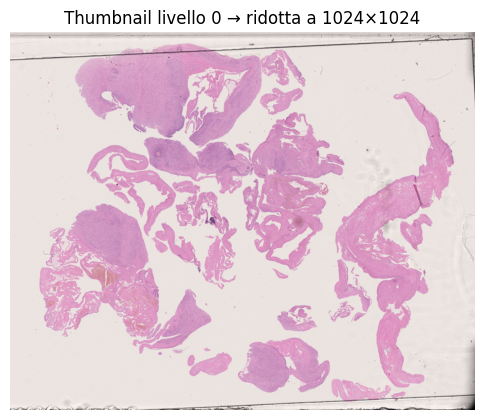

In [ ]:
# Crea una miniatura con lato massimo 1024px
thumb = slide_b.get_thumbnail((1024, 1024))
plt.figure(figsize=(6,6))
plt.imshow(thumb)
plt.axis('off')
plt.title('Thumbnail livello 0 → ridotta a 1024×1024')
plt.show()


In [ ]:
!git clone https://github.com/LucaIanniello/MLIAProject.git

Cloning into 'MLIAProject'...
remote: Enumerating objects: 304, done.
remote: Counting objects: 100% (171/171), done.
remote: Compressing objects: 100% (122/122), done.
remote: Total 304 (delta 83), reused 127 (delta 46), pack-reused 133 (from 1)
Receiving objects: 100% (304/304), 78.01 MiB | 18.70 MiB/s, done.
Resolving deltas: 100% (106/106), done.


In [ ]:
!pip install -q condacolab
import condacolab
condacolab.install()

!conda env create -f MLIAProject/CLAM/env.yml
!conda install -n clam_latest -c conda-forge openslide
!conda install -n clam_latest -c conda-forge openslide-tools libopenslide0 libtiff-dev libjpeg-dev
!conda run -n clam_latest python --version
!conda run -n clam_latest pip list

!apt-get update
!apt-get install -y openslide-tools libopenslide0 libtiff-dev libjpeg-dev

⏬ Downloading https://github.com/jaimergp/miniforge/releases/download/24.11.2-1_colab/Miniforge3-colab-24.11.2-1_colab-Linux-x86_64.sh...
📦 Installing...
📌 Adjusting configuration...
🩹 Patching environment...
⏲ Done in 0:00:13
🔁 Restarting kernel...
Channels:
 - conda-forge
Platform: linux-64
Solving environment: - \ done


==> WARNING: A newer version of conda exists. <==
    current version: 24.11.2
    latest version: 25.5.0

Please update conda by running

    $ conda update -n base -c conda-forge conda



python-3.10.0        | 29.8 MB   | :   0% 0/1 [00:00<?, ?it/s]
tk-8.6.13            | 3.1 MB    | :   0% 0/1 [00:00<?, ?it/s]

openssl-3.5.0        | 3.0 MB    | :   0% 0/1 [00:00<?, ?it/s]


pip-25.1.1           | 1.2 MB    | :   0% 0/1 [00:00<?, ?it/s]



libsqlite-3.50.0     | 897 KB    | :   0% 0/1 [00:00<?, ?it/s]




sqlite-3.50.0        | 878 KB    | :   0% 0/1 [00:00<?, ?it/s]





ncurses-6.5          | 871 KB    | :   0% 0/1 [00:00<?, ?it/s]






libgcc-15.1.0     

In [ ]:

!conda --version
!which conda
!conda config --show-sources
!conda env update -n base -f MLIAProject/CLAM/env.yml


conda 24.11.2
/usr/local/bin/conda
==> /usr/local/.condarc <==
channels:
  - conda-forge
always_yes: True

Channels:
 - conda-forge
Platform: linux-64
Solving environment: / failed

SpecsConfigurationConflictError: Requested specs conflict with configured specs.
  requested specs: 
    - pip
    - python==3.10
  pinned specs: 
    - cuda-version=12
    - python=3.11
    - python_abi=3.11[build=*cp311*]
Use 'conda config --show-sources' to look for 'pinned_specs' and 'track_features'
configuration parameters.  Pinned specs may also be defined in the file
/usr/local/conda-meta/pinned.




In [ ]:
!cp -r MLIAProject/presets .

In [ ]:
!MPLBACKEND=Agg conda run -n clam_latest python MLIAProject/CLAM/create_patches_fp.py \
    --source ndpi_files/B/ \
    --save_dir results/results_patches/RESULTS_DIRECTORY_12_B \
    --patch_size 256 \
    --seg \
    --patch \
    --stitch \
    --preset process_list_edited_th12.csv



source:  ndpi_files/B/
patch_save_dir:  results/results_patches/RESULTS_DIRECTORY_12_B/patches
mask_save_dir:  results/results_patches/RESULTS_DIRECTORY_12_B/masks
stitch_save_dir:  results/results_patches/RESULTS_DIRECTORY_12_B/stitches
source : ndpi_files/B/
save_dir : results/results_patches/RESULTS_DIRECTORY_12_B
patch_save_dir : results/results_patches/RESULTS_DIRECTORY_12_B/patches
mask_save_dir : results/results_patches/RESULTS_DIRECTORY_12_B/masks
stitch_save_dir : results/results_patches/RESULTS_DIRECTORY_12_B/stitches
{'seg_params': {'seg_level': np.int64(6), 'sthresh': np.int64(12), 'mthresh': np.int64(7), 'close': np.int64(4), 'use_otsu': np.False_, 'keep_ids': 'none', 'exclude_ids': 'none'}, 'filter_params': {'a_t': np.float64(120.0), 'a_h': np.float64(16.0), 'max_n_holes': np.int64(8)}, 'patch_params': {'use_padding': np.True_, 'contour_fn': 'four_pt'}, 'vis_params': {'vis_level': np.int64(6), 'line_thickness': np.int64(250)}}


progress: 0.00, 0/1
processing M-90.ndpi
Cr

In [ ]:
!MPLBACKEND=Agg conda run -n clam_latest python MLIAProject/CLAM/create_patches_fp.py \
    --source ndpi_files/E/ \
    --save_dir results/results_patches/RESULTS_DIRECTORY_12_E \
    --patch_size 256 \
    --seg \
    --patch \
    --stitch \
    --preset process_list_edited_th12.csv



source:  ndpi_files/E/
patch_save_dir:  results/results_patches/RESULTS_DIRECTORY_12_E/patches
mask_save_dir:  results/results_patches/RESULTS_DIRECTORY_12_E/masks
stitch_save_dir:  results/results_patches/RESULTS_DIRECTORY_12_E/stitches
source : ndpi_files/E/
save_dir : results/results_patches/RESULTS_DIRECTORY_12_E
patch_save_dir : results/results_patches/RESULTS_DIRECTORY_12_E/patches
mask_save_dir : results/results_patches/RESULTS_DIRECTORY_12_E/masks
stitch_save_dir : results/results_patches/RESULTS_DIRECTORY_12_E/stitches
{'seg_params': {'seg_level': np.int64(6), 'sthresh': np.int64(12), 'mthresh': np.int64(7), 'close': np.int64(4), 'use_otsu': np.False_, 'keep_ids': 'none', 'exclude_ids': 'none'}, 'filter_params': {'a_t': np.float64(120.0), 'a_h': np.float64(16.0), 'max_n_holes': np.int64(8)}, 'patch_params': {'use_padding': np.True_, 'contour_fn': 'four_pt'}, 'vis_params': {'vis_level': np.int64(6), 'line_thickness': np.int64(250)}}


progress: 0.00, 0/1
processing M-21.ndpi
Cr

In [ ]:
!MPLBACKEND=Agg conda run -n clam_latest python MLIAProject/CLAM/create_patches_fp.py \
    --source ndpi_files/S/ \
    --save_dir results/results_patches/RESULTS_DIRECTORY_12_S \
    --patch_size 256 \
    --seg \
    --patch \
    --stitch \
    --preset process_list_edited_th12.csv



source:  ndpi_files/S/
patch_save_dir:  results/results_patches/RESULTS_DIRECTORY_12_S/patches
mask_save_dir:  results/results_patches/RESULTS_DIRECTORY_12_S/masks
stitch_save_dir:  results/results_patches/RESULTS_DIRECTORY_12_S/stitches
source : ndpi_files/S/
save_dir : results/results_patches/RESULTS_DIRECTORY_12_S
patch_save_dir : results/results_patches/RESULTS_DIRECTORY_12_S/patches
mask_save_dir : results/results_patches/RESULTS_DIRECTORY_12_S/masks
stitch_save_dir : results/results_patches/RESULTS_DIRECTORY_12_S/stitches
{'seg_params': {'seg_level': np.int64(6), 'sthresh': np.int64(12), 'mthresh': np.int64(7), 'close': np.int64(4), 'use_otsu': np.False_, 'keep_ids': 'none', 'exclude_ids': 'none'}, 'filter_params': {'a_t': np.float64(120.0), 'a_h': np.float64(16.0), 'max_n_holes': np.int64(8)}, 'patch_params': {'use_padding': np.True_, 'contour_fn': 'four_pt'}, 'vis_params': {'vis_level': np.int64(6), 'line_thickness': np.int64(250)}}


progress: 0.00, 0/1
processing M-101.ndpi
C

In [ ]:
!MPLBACKEND=Agg conda run -n clam_latest python -u MLIAProject/CLAM/extract_features_fp.py \
    --data_h5_dir "/content/results/results_patches/RESULTS_DIRECTORY_12_B/" \
    --data_slide_dir "/content/ndpi_files/B/" \
    --csv_path "/content/results/results_patches/RESULTS_DIRECTORY_12_B/process_list_autogen.csv" \
    --feat_dir results/results_features \
    --batch_size 128 \
    --slide_ext .ndpi

In [8]:
!MPLBACKEND=Agg conda run -n clam_latest python -u MLIAProject/CLAM/extract_features_fp.py \
    --data_h5_dir "/content/results/results_patches/RESULTS_DIRECTORY_12_E/" \
    --data_slide_dir "/content/ndpi_files/E/" \
    --csv_path "/content/results/results_patches/RESULTS_DIRECTORY_12_E/process_list_autogen.csv" \
    --feat_dir results/results_features \
    --batch_size 128 \
    --slide_ext .ndpi

initializing dataset
loading model checkpoint
TimmCNNEncoder(
  (model): FeatureListNet(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (act1): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (act1): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (drop_block): Identity()
        (act2): ReLU(inplace=True)
        (aa): Identity()
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), 

In [ ]:
!MPLBACKEND=Agg conda run -n clam_latest python -u MLIAProject/CLAM/extract_features_fp.py \
    --data_h5_dir "/content/results/results_patches/RESULTS_DIRECTORY_12_S/" \
    --data_slide_dir "/content/ndpi_files/S/" \
    --csv_path "/content/results/results_patches/RESULTS_DIRECTORY_12_S/process_list_autogen.csv" \
    --feat_dir results/results_features \
    --batch_size 128 \
    --slide_ext .ndpi

In [ ]:
import h5py
import torch

B_file = B[0].split('.')[0]

data = torch.load(f'results/results_features/pt_files/{B_file}.pt')
# Sostituisci 'nome_file.h5' con il percorso del tuo file .h5
with h5py.File(f'/content/results/results_patches/RESULTS_DIRECTORY_12_B/patches/B_file.h5', 'r') as f:
    n_patches = f['coords'].shape[0]  # oppure f['coords'].shape[0]
    print(f"Numero di patch: {n_patches}")

print(type(data))
print(len(data))  # se è una lista
print(data.shape) # se è un tensore
print(data[:5])  # se è una lista o un tensore


In [ ]:
import h5py

E_file = E[0].split('.')[0]

data = torch.load(f'results/results_features/pt_files/{E_file}.pt')
# Sostituisci 'nome_file.h5' con il percorso del tuo file .h5
with h5py.File(f'/content/results/results_patches/RESULTS_DIRECTORY_12_E/patches/{E_file}.h5', 'r') as f:
    n_patches = f['coords'].shape[0]  # oppure f['coords'].shape[0]
    print(f"Numero di patch: {n_patches}")


print(type(data))
print(len(data))  # se è una lista
print(data.shape) # se è un tensore
print(data[:5])  # se è una lista o un tensore

In [ ]:
import h5py

S_file = S[0].split('.')[0]

data = torch.load(f'results/results_features/pt_files/{S_file}.pt')
# Sostituisci 'nome_file.h5' con il percorso del tuo file .h5
with h5py.File(f'/content/results/results_patches/RESULTS_DIRECTORY_12_S/patches/{S_file}.h5', 'r') as f:
    n_patches = f['coords'].shape[0]  # oppure f['coords'].shape[0]
    print(f"Numero di patch: {n_patches}")

print(type(data))
print(len(data))  # se è una lista
print(data.shape) # se è un tensore
print(data[:5])  # se è una lista o un tensore

In [ ]:
dataset_csv = []
for i in range(len(B)):
    v = B[i].split('.')[0]
    dataset_csv.append([v,v,'B'])
for i in range(len(S)):
    v = S[i].split('.')[0]
    dataset_csv.append([v,v,'S'])
for i in range(len(E)):
    v = E[i].split('.')[0]
    dataset_csv.append([v,v,'E'])

In [ ]:
import csv
# Nome del file CSV
file_csv = 'results/datasetComposition.csv'

# Scrittura del file CSV
with open(file_csv, mode='w', newline='') as file:
    writer = csv.writer(file)
    # Scrivere l'intestazione
    writer.writerow(['case_id', 'slide_id', 'label'])
    # Scrivere i dati
    writer.writerows(dataset_csv)

print(f"File CSV salvato: {file_csv}")

In [ ]:
# Crea un archivio ZIP della cartella
def create_zip_archive(folder_path, zip_name=None):
    """
    Crea un archivio ZIP di una cartella mantenendo la struttura
    """
    if zip_name is None:
        zip_name = f"{os.path.basename(folder_path)}.zip"

    print(f"🗜️ Creando archivio ZIP: {zip_name}")

    with zipfile.ZipFile(zip_name, 'w', zipfile.ZIP_DEFLATED) as zipf:
        for root, dirs, files in os.walk(folder_path):
            for file in files:
                file_path = os.path.join(root, file)
                # Mantiene la struttura delle cartelle nell'archivio
                arc_name = os.path.relpath(file_path, os.path.dirname(folder_path))
                zipf.write(file_path, arc_name)
                print(f"  📁 Aggiunto: {arc_name}")

    # Mostra dimensione dell'archivio
    zip_size = os.path.getsize(zip_name)
    print(f"✅ Archivio creato: {zip_name} ({zip_size/1024/1024:.2f} MB)")
    return zip_name

In [ ]:
# Percorso della cartella da caricare
folder_to_upload = '/content/results'  # Cambia con il percorso della tua cartella
zip_filename = 'datasetCompleted.zip'  # Nome dell'archivio
zip_path = create_zip_archive(folder_to_upload, zip_filename)


In [ ]:
import torch
import requests
import json
import os

# Token di accesso Zenodo (sostituisci con il tuo)
ACCESS_TOKEN = 'uVSb7icJqT9efPM71KYgviJ50r7eML9ynei2q7hDkedVlFrf8fBsr9lFaJ3O'

# Crea una nuova deposizione
def create_deposition():
    url = 'https://zenodo.org/api/deposit/depositions'
    headers = {"Content-Type": "application/json"}
    params = {'access_token': ACCESS_TOKEN}

    data = {
        'metadata': {
            'title': 'DatasetMLiA-FP01',
            'upload_type': 'dataset',
            'description': 'Dataset concatenato con features multiple da WSI',
            'creators': [{'name': 'Raf-Tony-Luca'}]
        }
    }

    r = requests.post(url, params=params, data=json.dumps(data), headers=headers)
    return r.json()

# Carica il file
def upload_file(deposition_id, file_path):
    # Get bucket URL
    url = f'https://zenodo.org/api/deposit/depositions/{deposition_id}'
    params = {'access_token': ACCESS_TOKEN}
    r = requests.get(url, params=params)
    bucket_url = r.json()["links"]["bucket"]

    # Upload file
    filename = os.path.basename(file_path)
    with open(file_path, "rb") as fp:
        r = requests.put(f"{bucket_url}/{filename}",
                        data=fp,
                        params=params)
    return r.json()

# Pubblica il dataset
def publish_deposition(deposition_id):
    url = f'https://zenodo.org/api/deposit/depositions/{deposition_id}/actions/publish'
    params = {'access_token': ACCESS_TOKEN}
    r = requests.post(url, params=params)
    return r.json()

# Esegui l'upload
print("Creando deposizione...")
deposition = create_deposition()
deposition_id = deposition['id']

print(f"Caricando file... (ID: {deposition_id})")
upload_result = upload_file(deposition_id, zip_filename)

print("Pubblicando dataset...")
publication = publish_deposition(deposition_id)

print(f"Dataset pubblicato! DOI: {publication['doi']}")
print(f"URL: {publication['links']['record_html']}")
